<img src='logo_ucm.png' width='200'/>

# <center>PROYECTO FINAL MACHINE LEARNING AIRBNB</center>

**PARTICIPANTES:**


BRYAM DAVID CHAMBA JARAMILLO

MARÍA GARCÍA RODRIGUEZ

MANUEL GRAU ROLDÁN

ÁLVARO MARTÍN LÓPEZ

LUIS JAVIER NATES ARECHAVALETA

ALVAR YEBEL DE BLAS FERNÁNDEZ

In [1]:
#import funciones_auxiliares 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
#Análisis Exploratorio
from scipy import stats
from scipy.stats import norm
import inspect
#Aprendizaje automático
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import \
    explained_variance_score, mean_squared_error,\
    r2_score,mean_absolute_error
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVR


## Introducción y Motivación

Como práctica final para este cuso de Aprendizaje automático hemos decidido desarrollar un evaluador automático de precios a partir de las carácterísticas de los alojamientos de Airbnb.
Esta compañía es una plataforma con gran interés en hacer que los anfitriones capten la atención de clientes potenciales, pues de ahí deriva el beneficio económico de la empresa. El precio es un factor principal que influye de manera sustancial en la decisión de reserva por parte de clientes potenciales, por eso es importante que los anfitriones sepan cuál es el mejor precio para sus ofertas en función de sus características y los intereses de los clientes. 

Este evaluador va a centrarse en qué características potenciales se correlacionan mejor con el precio de un alojamiento de Airbnb para que los anfitriones puedan ser aconsejados correctamente y elijan sus precios con mayor precisión. Al igual que en la práctica anterior, en este proyecto vamos a usar un conjunto de datos reales y por tanto potencialmente útiles a la hora de prepararnos para aplicar en un futuro las habilidades adquiridas durante este curso en el entorno laboral.

Para resumir las diferentes fases del trabajo, en un primer bloque de preprocessing analizaremos la estructura de los datos, imputaremos y trataremos outliers junto a datos faltantes, estudiaremos la variable objetivo "Price" (Precio del alojamiento), realizaremos varios gráficos para comprender mejor el dataset, estudiaremos la correlación entre variables y transformaremos y/o crearemos variables para mejorar el dataset.

Posteriormente tras la fase de preproceso, procederemos a preparar los datos de entrenamiento y test para comenzar a utilizar algoritmos estudiados en esta asignatura a fin de producir varios modelos de regresión de aprendizaje automático y calcular sus métricas. Nuestra elección en este caso han sido KNN, Regresión Lineal, Ramdom Forest y SVR, obviamente todos enfocados hacia un problema de regresión. Finalmente con todos los modelos realizaremos una evaluación de los resultados obtenidos a fin de sustentar una conclusión final para este proyecto.

# 1. Importación del Dataset

Primero importamos el conjunto de datos mediante read_csv de pandas y observamos su organización.

In [2]:
data = pd.read_csv('airbnb-listings-extract.csv', sep=';', error_bad_lines=False)

In [3]:
data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,...,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,...,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,...,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [4]:
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


El conjunto de datos tiene tal número de variables que no somos capaces de visualizarlas todas mediante estos métodos. Podemos deducir que necesitaremos enfocarnos primero en elegir y transformar variables para poder analizar con efectividad el dataset.

# 2. Transformación y eliminación de los datos

### 2.1. Selección de variables

Antes de proceder a eliminar variables y arriesgarnos a perder información importante, estudiaremos que variables son categóricas observando cuantos valores repetidos contienen y el tipo de datos en su interior.

In [5]:
for i in data.columns:
    n = len(pd.unique(data[i]))
    print("No.of.unique values of '"+i+"':", n)

No.of.unique values of 'ID': 14780
No.of.unique values of 'Listing Url': 14780
No.of.unique values of 'Scrape ID': 38
No.of.unique values of 'Last Scraped': 37
No.of.unique values of 'Name': 14376
No.of.unique values of 'Summary': 13290
No.of.unique values of 'Space': 10175
No.of.unique values of 'Description': 14282
No.of.unique values of 'Experiences Offered': 5
No.of.unique values of 'Neighborhood Overview': 7913
No.of.unique values of 'Notes': 4653
No.of.unique values of 'Transit': 7840
No.of.unique values of 'Access': 7129
No.of.unique values of 'Interaction': 6586
No.of.unique values of 'House Rules': 8031
No.of.unique values of 'Thumbnail Url': 11958
No.of.unique values of 'Medium Url': 11958
No.of.unique values of 'Picture Url': 14758
No.of.unique values of 'XL Picture Url': 11958
No.of.unique values of 'Host ID': 8935
No.of.unique values of 'Host URL': 8935
No.of.unique values of 'Host Name': 3277
No.of.unique values of 'Host Since': 2117
No.of.unique values of 'Host Location'

In [6]:
data.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

Tal y como ya hemos fijado previamente, la variable regresora objetivo que queremos obtener será el precio, "Price".

In [7]:
y = data['Price']

A continuación escogemos las variables con las que vamos a trabajar a la hora de crear el evaluador. 
Algunas variables las eliminamos por ser muy parecidas entre si y por tanto, redundantes, otras por no aportar información del problema (Como, por ejemplo, números de identificación) y otras como 'Monthly Price' por ser hasta cierto punto derivadas de nuestra variable objetivo.

In [8]:
data=data[['Host Since','Host Response Rate','Host Acceptance Rate',
            'Host Listings Count','Host Total Listings Count',
            'Host Verifications','Market','Property Type','Room Type',
            'Accommodates','Bathrooms','Bedrooms','Beds','Bed Type',
            'Amenities','Square Feet',
            'Cleaning Fee','Guests Included','Extra People','Minimum Nights',
            'Maximum Nights','Availability 365','Number of Reviews',
            'Review Scores Rating','License','Cancellation Policy',
             'Calculated host listings count','Reviews per Month','Geolocation',
             'Features','Latitude','Longitude']
            ]

In [9]:
data.shape

(14780, 32)

In [10]:
data.head()

,Host Since,Host Response Rate,Host Acceptance Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Market,Property Type,Room Type,Accommodates,...,Number of Reviews,Review Scores Rating,License,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features,Latitude,Longitude
0,2016-02-11,100.0,NaN,1.0,1.0,"email,phone,reviews,kba",Austin,Loft,Entire home/apt,2,...,42,98.0,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id...",30.337361,-97.863277
1,2016-11-08,100.0,NaN,162.0,162.0,"email,phone,reviews,work_email",Barcelona,Apartment,Entire home/apt,4,...,1,80.0,HUTB-006721,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ...",41.389683,2.172625
2,2016-11-08,100.0,NaN,162.0,162.0,"email,phone,reviews,work_email",Barcelona,Apartment,Entire home/apt,4,...,0,NaN,HUTB-007527,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ...",41.393035,2.162173
3,2010-05-25,100.0,NaN,27.0,27.0,"email,phone,facebook,reviews,manual_offline,ju...",Barcelona,Apartment,Entire home/apt,8,...,13,92.0,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re...",41.396967,2.167418
4,2016-01-12,99.0,NaN,207.0,207.0,"email,phone,reviews,jumio",Barcelona,Apartment,Entire home/apt,5,...,0,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is...",41.388685,2.155150


Ahora los datos tienen una organización fácil de visualizar, sin variables redundantes o ajenas a nuestros intereses.

### 2.2. Matriz de correlación en variables continuas

Construimos y estudiamos la matriz de correlación para averiguar si algunas variables aportan información demasiado similar entre sí mismas a nuestro modelo de regresión, lo que permitiría eliminar algunas variables para simplificar los datos.

In [11]:
list_var_continuous = list(data.select_dtypes('float').columns)+list(data.select_dtypes('int').columns)

In [12]:
import funciones_auxiliares

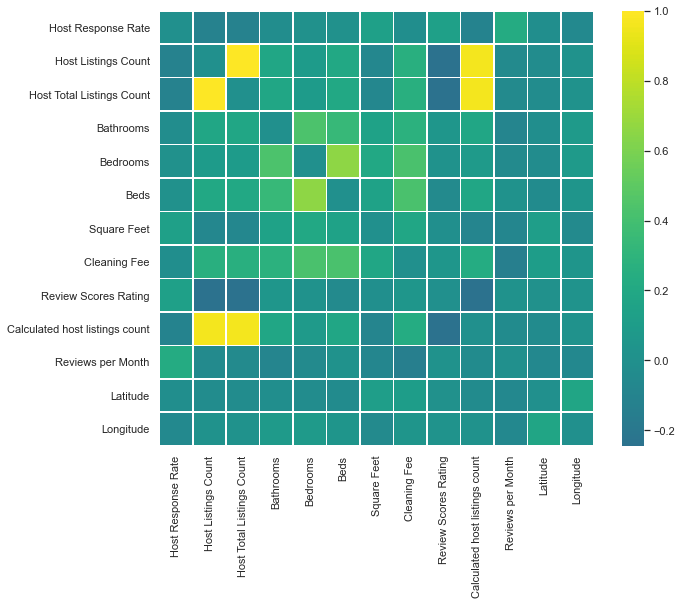

0

In [13]:
funciones_auxiliares.get_corr_matrix(dataset = data[list_var_continuous], metodo='spearman', size_figure=[10,8])

Con un simple análisis cualitativo parece claro que 3 de las variables relacionadas tienen el máximo grado de correlación posible por lo que podemos prescindir de dos de ellas para así, simplificar levemente el modelo.

In [14]:
data = data.drop(['Host Total Listings Count', 'Host Listings Count'], axis = 1)

In [15]:
data.columns

Index(['Host Since', 'Host Response Rate', 'Host Acceptance Rate',
       'Host Verifications', 'Market', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Amenities', 'Square Feet', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'License',
       'Cancellation Policy', 'Calculated host listings count',
       'Reviews per Month', 'Geolocation', 'Features', 'Latitude',
       'Longitude'],
      dtype='object')

# 3.Transformación de variables

### 3.1. Cancellation Policy

Utilizaremos los cuantiles para poder distibuir los valores de la variable "Cancellation Policy" en cuatro categorías y así la transformaremos en una variable con la que podremos trabajar eficientemente.

In [16]:
data['Cancellation Policy'].value_counts()

strict             5742
flexible           4671
moderate           4248
strict_new           34
super_strict_60      32
moderate_new         20
super_strict_30      19
flexible_new         14
Name: Cancellation Policy, dtype: int64

In [17]:
data['Cancellation Policy'] = data['Cancellation Policy'].replace({'strict': 0.25, 'flexible':0.9, 'moderate': 0.5,
                                                                   'strict_new': 0.25, 'super_strict_60':0, 'super_strict_30':0,
                                                                  'moderate_new':0.5, 'flexible_new': 0.9}).astype('float')

Al estandarizar los datos con la división del X_train y X_test se conseguirá mejorar el algoritmo

### 3.3. Host Since

El siguiente paso será transformar la fecha desde la que el dueño del airbnb ofrece un alojamiento "Host Since" en días desde esa fecha.

In [18]:
fecha = pd.to_datetime(data['Host Since'])
#Creamos una variable que reste la maxima fecha de nuestra base de datos a la fecha del anfitrión 
tiempo_anfitrión = (max(fecha) - fecha).astype('timedelta64[D]')
#Sustituimos por la variable fecha para que sea más sencillo utilizarla a la hora de los modelos 
data['Host Since'] = tiempo_anfitrión
data['Host Since'] = data['Host Since'].fillna(0)

### 3.4. Amenities, Features, Host Verifications y License

En esta sección trataremos las variables que estaban en formato string y las transformaremos en ristras de variables binarias. Posteriormente usaremos análisis de componentes principales (PCA) para reducirlas.

In [19]:
def str_to_dataframe(data,column):
    datos=[]
    for i in data[column]:
        if type(i)== float:#si es np.nan creamos un diccionario vacio
            lista={}
        else:#en caso contrario creamos un diccionario con los datos
            aux =i.split(',')
            lista={}
            for j in aux:
                lista[j]=True
        datos.append(lista)#añadimos el diccionario creada a la lista
    return(pd.DataFrame(datos).fillna(False))#transformamos la list en dataframe 
    

Dado que todas las variables que nos saldrán son dicotómicas usaremos el PCA para tranformarlas en variables continuas. (Previamente probamos usar clustering jerárquico sobre estas variables tomando la distancia de Manhattan pero dado que el tiempo de carga era excesivo y los resultados no presentaban mejores cualidades que los obtenidos por PCA, descartamos el método).

In [20]:
def str_to_continuous(data, columns,N_components):
    '''
    El siguiente código 
    data: dataframe a usar 
    columns: columnar que se quieren transformar 
    n_components:lista con numero de componentes que se quieren obtener por fila 
    
    '''
    from sklearn.decomposition import PCA
    X_transK=pd.DataFrame()
    for i,column in enumerate(columns):
        datos=str_to_dataframe(data,column)
        if column=='Host Verifications':#Contaremos License como parte de host verification
            datos['License']=data['License'].isna()           
        pca = PCA(n_components=N_components[i])
        pca.fit(datos)
        print(pca.explained_variance_ratio_.sum())
        labels=[]
        for i in range(N_components[i]):
            labels.append(column+'_'+str(i))
        data= data.join(pd.DataFrame(pca.transform(datos),columns=labels))
    return data

Tras varias pruebas decidimos utilizar 12 componentes para "Amenities",
3 para "Features" y 3 para "Host Verifications".

In [21]:
columns=['Amenities','Features','Host Verifications']
N_components=[12,3,3]
data=str_to_continuous(data, columns,N_components)

0.6295268427716112
0.7710154876416945
0.615729112288576


In [22]:
data=data.drop(['Amenities','Features','Host Verifications','License'],axis=1)

In [23]:
data

,Host Since,Host Response Rate,Host Acceptance Rate,Market,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,...,Amenities_8,Amenities_9,Amenities_10,Amenities_11,Features_0,Features_1,Features_2,Host Verifications_0,Host Verifications_1,Host Verifications_2
0,421.0,100.0,NaN,Austin,Loft,Entire home/apt,2,1.0,1.0,1.0,...,-0.491552,0.134432,0.638500,0.143109,-0.441616,-0.630208,-0.066578,-0.619940,-0.101797,0.106469
1,150.0,100.0,NaN,Barcelona,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,0.331882,-0.017079,0.918083,0.629025,0.531915,0.912232,0.267454,-0.541394,-0.128328,-0.093625
2,150.0,100.0,NaN,Barcelona,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,0.331882,-0.017079,0.918083,0.629025,0.531915,0.912232,0.267454,-0.541394,-0.128328,-0.093625
3,2509.0,100.0,NaN,Barcelona,Apartment,Entire home/apt,8,2.0,3.0,4.0,...,-0.701075,0.550238,0.195719,-0.079761,-0.258650,0.582044,0.767222,0.408022,0.634086,-0.754867
4,451.0,99.0,NaN,Barcelona,Apartment,Entire home/apt,5,1.0,2.0,2.0,...,0.003395,0.194130,-0.041509,-0.035044,-0.717360,0.388629,-0.098217,0.218679,-0.313825,-0.301971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,1206.0,100.0,NaN,New York,Apartment,Entire home/apt,2,1.0,1.0,2.0,...,0.311226,0.089254,0.474715,0.124541,-0.441616,-0.630208,-0.066578,0.218679,-0.313825,-0.301971
14776,14.0,NaN,NaN,Paris,Bed & Breakfast,Private room,1,1.0,1.0,2.0,...,-0.045573,-0.386270,0.328992,-0.347488,0.053822,0.666518,-0.601453,-0.711725,0.004053,0.461924
14777,641.0,100.0,NaN,Paris,Apartment,Entire home/apt,5,1.0,2.0,3.0,...,-0.120113,-0.504295,-0.266514,0.837055,0.017094,-0.436794,0.798862,0.218679,-0.313825,-0.301971
14778,1479.0,100.0,80%,Denver,Apartment,Entire home/apt,4,1.0,1.0,2.0,...,-0.327854,-0.542825,-0.352613,0.847676,-0.347748,-0.583844,-0.100140,0.386172,0.660100,-0.476575


### 3.5. Property Type

A la hora de estudiar la variable "Property Type" observamos que la gran mayoría de alojamientos en el dataset son apartamentos, casas y construcciones parecidas y una minoría de alojamientos pertenece a una gran cantidad de diferentes tipos de vivienda bastante inusuales en el dataset, como barcos o bungalows.

Por tanto englobaremos todos los alojamientos en tres categorías, apartamentos, casas u otros tipos de vivienda, para así seguir simplificando los datos.

In [24]:
data['Property Type'].value_counts()

Apartment             11962
House                  1368
Condominium             363
Bed & Breakfast         353
Loft                    305
Other                   225
Dorm                     44
Guesthouse               42
Chalet                   26
Villa                    19
Townhouse                17
Hostel                   16
Serviced apartment       13
Boutique hotel            6
Boat                      4
Camper/RV                 4
Guest suite               3
Casa particular           3
Earth House               3
Bungalow                  2
Tent                      1
Timeshare                 1
Name: Property Type, dtype: int64

In [25]:
data['Property Type'].replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Guesthouse': 'House',
    'Casa particular': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth House': 'House',
    'Chalet': 'House',
    'Boutique hotel': 'Other',
    'Condominium': 'Other',
    'Bed & Breakfast': 'Other',
    'Dorm': 'Other',
    'Hostel': 'Other',
    'Guest suite': 'Other',
    'Tent': 'Other',
    'Timeshare': 'Other',
    'Boat': 'Other',
    'Camper/RV': 'Other'
    }, inplace=True)


In [26]:
data['Property Type'].value_counts()

Apartment    12280
House         1480
Other         1020
Name: Property Type, dtype: int64

### 3.6. Geolocalización

Dado que la variable "Geolocation" tiene dos componentes, latitud y longitud, crearemos una nueva variable que estará constituida por el producto entre la latitud y longitud de las coordenadas en las que estaba el alojamiento, de tal forma reducimos las variables. A parte las viviendas cercanas entre sí tendrán valores similares lo cual ofrece información más valiosa que la latitud y la longitud por separado.

In [27]:
data['Geolocation']=data['Latitude']*data['Longitude']

In [28]:
data=data.drop(['Longitude','Latitude'],1)

### 3.7 Host acceptance rate

En esta última transformación trataremos la variable "Host Acceptance Rate". En este caso, el método usado para representar el porcentaje no es práctico a la hora de usar los modelos que tenemos preparados, así que simplemente cambiaremos el formato de la variable para evitar inconvenientes.

In [29]:
lista=[]
for i in data['Host Acceptance Rate']:
    lista.append(float(str(i).replace('%','')))
data['Host Acceptance Rate']=lista

# 4. Imputación de Valores Missing

Los conjuntos de datos pueden tener valores faltantes y esto puede causar problemas para muchos algoritmos de aprendizaje automático. Por ejemplo, el algoritmo Ramdom Forest no puede trabajar con un dataset con datos faltantes.

Por tanto, ahora procederemos a identificar y reemplazar los valores perdidos para cada columna en sus datos de entrada antes de modelar su tarea de predicción, es decir, imputaremos los datos perdidos. Primero nos centraremos en la variables continuas para proceder después con las categóricas.

### 4.1. Variables Continuas

In [30]:
list_var_continuous = list(data.select_dtypes('float').columns)+list(data.select_dtypes('int').columns)
list_var_discrets = list(data.select_dtypes('object').columns)


In [31]:
data[list_var_continuous]

,Host Since,Host Response Rate,Host Acceptance Rate,Bathrooms,Bedrooms,Beds,Square Feet,Cleaning Fee,Review Scores Rating,Cancellation Policy,...,Amenities_8,Amenities_9,Amenities_10,Amenities_11,Features_0,Features_1,Features_2,Host Verifications_0,Host Verifications_1,Host Verifications_2
0,421.0,100.0,NaN,1.0,1.0,1.0,NaN,NaN,98.0,0.50,...,-0.491552,0.134432,0.638500,0.143109,-0.441616,-0.630208,-0.066578,-0.619940,-0.101797,0.106469
1,150.0,100.0,NaN,1.0,1.0,1.0,NaN,40.0,80.0,0.00,...,0.331882,-0.017079,0.918083,0.629025,0.531915,0.912232,0.267454,-0.541394,-0.128328,-0.093625
2,150.0,100.0,NaN,1.0,1.0,1.0,NaN,60.0,NaN,0.00,...,0.331882,-0.017079,0.918083,0.629025,0.531915,0.912232,0.267454,-0.541394,-0.128328,-0.093625
3,2509.0,100.0,NaN,2.0,3.0,4.0,NaN,79.0,92.0,0.25,...,-0.701075,0.550238,0.195719,-0.079761,-0.258650,0.582044,0.767222,0.408022,0.634086,-0.754867
4,451.0,99.0,NaN,1.0,2.0,2.0,NaN,55.0,NaN,0.90,...,0.003395,0.194130,-0.041509,-0.035044,-0.717360,0.388629,-0.098217,0.218679,-0.313825,-0.301971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,1206.0,100.0,NaN,1.0,1.0,2.0,NaN,60.0,95.0,0.25,...,0.311226,0.089254,0.474715,0.124541,-0.441616,-0.630208,-0.066578,0.218679,-0.313825,-0.301971
14776,14.0,NaN,NaN,1.0,1.0,2.0,NaN,NaN,NaN,0.90,...,-0.045573,-0.386270,0.328992,-0.347488,0.053822,0.666518,-0.601453,-0.711725,0.004053,0.461924
14777,641.0,100.0,NaN,1.0,2.0,3.0,NaN,40.0,94.0,0.25,...,-0.120113,-0.504295,-0.266514,0.837055,0.017094,-0.436794,0.798862,0.218679,-0.313825,-0.301971
14778,1479.0,100.0,80.0,1.0,1.0,2.0,NaN,10.0,100.0,0.50,...,-0.327854,-0.542825,-0.352613,0.847676,-0.347748,-0.583844,-0.100140,0.386172,0.660100,-0.476575


In [32]:
lista=data[list_var_continuous].isna().sum()
var_na=[]
for i,j in enumerate(lista):
    if lista[list_var_continuous[i]]>0:
        var_na.append(list_var_continuous[i])

In [33]:
data[var_na].isna().mean()

Host Response Rate                0.128484
Host Acceptance Rate              0.997361
Bathrooms                         0.003721
Bedrooms                          0.001691
Beds                              0.003315
Square Feet                       0.959540
Cleaning Fee                      0.412246
Review Scores Rating              0.223545
Calculated host listings count    0.000271
Reviews per Month                 0.213938
dtype: float64

En la variable "Cleaning Fee" observamos que la falta de valor significa que dicho alojamiento no cobra tasa de limpieza. Por tanto sustituimos los valores faltantes por la cantidad 0.

In [34]:
data['Cleaning Fee']=data['Cleaning Fee'].fillna(0)

Las variables que hacen referencia al número de recursos que hay en un alojamiento, "Bathrooms",  "Bedrooms" y "Beds" presentan una situación parecida. Por tanto sustituimos los valores faltantes por la cantidad 0, para representar la falta de baños, dormitorios o camas en un alojamiento.

In [35]:
data['Bathrooms']=data['Bathrooms'].fillna(0)
data['Bedrooms']=data['Bedrooms'].fillna(0)
data['Beds']=data['Beds'].fillna(0)

Hay dos variables que trataban información que podría haber sido muy útil al proyecto, "Host Acceptance Rate" y "Square Feet", sin embargo ambas están compuestas en mas de un 96% de datos faltantes y por tanto carecen de utilidad a la hora de crear el evaluador. En conclusión eliminamos ambas variables.

In [36]:
data=data.drop(['Host Acceptance Rate','Square Feet'],1)

En el caso de las variables "Host Response Rate", "Review Scores Rating", "Calculated Host Listings Count" y "Reviews per Month", los datos faltantes hacen referencia a usuarios que llevan tan poco tiempo usando la plataforma que todavía no han podido participar en ninguna de las operaciones registradas por estas variables. Consecuentemente, estableceremos que los datos faltantes sean 0.

In [ ]:
data['Host Response Rate']=data['Host Response Rate'].fillna(0)
data['Review Scores Rating']=data['Review Scores Rating'].fillna(0)
data['Calculated Host Listings Count']=data['Calculated Host Listings Count'].fillna(0)
data['Reviews per Month']=data['Reviews per Month'].fillna(0)

Finalmente para el resto de datos faltantes en variables continuas aplicamos un imputador simple que use la media como estrategia. 

In [37]:
list_var_continuous = list(data.select_dtypes('float').columns)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data[list_var_continuous])
data[list_var_continuous]=imputer.transform(data[list_var_continuous])

### 4.2. Variables Categóricas

In [38]:
list_var_discrets = list(data.select_dtypes('object').columns)
list_var_discrets

['Market', 'Property Type', 'Room Type', 'Bed Type']

In [39]:
data[list_var_discrets].isna().mean()

Market           0.003857
Property Type    0.000000
Room Type        0.000000
Bed Type         0.000000
dtype: float64

In [40]:
data[list_var_discrets]

,Market,Property Type,Room Type,Bed Type
0,Austin,Apartment,Entire home/apt,Real Bed
1,Barcelona,Apartment,Entire home/apt,Real Bed
2,Barcelona,Apartment,Entire home/apt,Real Bed
3,Barcelona,Apartment,Entire home/apt,Real Bed
4,Barcelona,Apartment,Entire home/apt,Real Bed
...,...,...,...,...
14775,New York,Apartment,Entire home/apt,Real Bed
14776,Paris,Other,Private room,Real Bed
14777,Paris,Apartment,Entire home/apt,Real Bed
14778,Denver,Apartment,Entire home/apt,Real Bed


Las variables categóricas nos presentan muchos menos inconvenientes que las continuas, siendo "Market" la única de ellas con valores faltantes. Tras una leve investigación descubrimos que esta variable designa en que zona se situa el alojamiento, como el sistema ofrece zonas determinadas deducimos que los datos faltantes representan que el alojamiento está en zonas no registradas en el sistema a las que llamaremos "Other". 

In [41]:
data['Market']=data['Market'].fillna('Other')

# 5. Estudio de la Variable Objetivo

Siendo "Price" nuestra variable objetivo la hemos dejado apartada durante las fases anteriores del preprocesado de datos. A continuación estudiaremos esta variable y sus propiedades en el dataset.

### 5.1. Distribución de los Alojamientos según la Variable Objetivo (Búsqueda de Outliers)

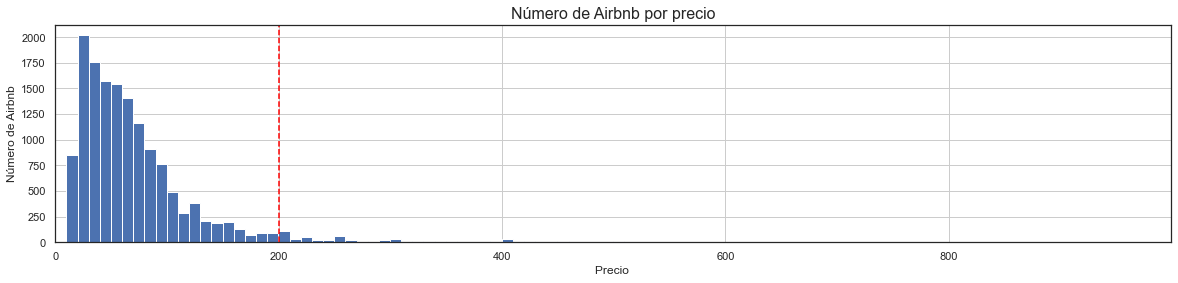

In [42]:
plt.figure(figsize=(20,4))
y.hist(bins=100, range=(0,max(y)))
plt.margins(x=0)
plt.axvline(200, color='red', linestyle='--')
plt.title("Número de Airbnb por precio", fontsize=16)
plt.xlabel("Precio ")
plt.ylabel("Número de Airbnb")
plt.show()

En vista de este gráfico y debido a la baja frecuencia relativa de algunos precios, vamos a filtrar el dataset. Escogeremos las observaciones correspondientes a los alojamientos con precios menores a 220.

In [43]:
data = pd.concat([y,data],axis=1)

In [44]:
datos = data.drop(data[data['Price']>220].index)
datos.shape

(14300, 41)

In [45]:
datos.head()

,Price,Host Since,Host Response Rate,Market,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,...,Amenities_8,Amenities_9,Amenities_10,Amenities_11,Features_0,Features_1,Features_2,Host Verifications_0,Host Verifications_1,Host Verifications_2
0,58.0,421.0,100.0,Austin,Apartment,Entire home/apt,2,1.0,1.0,1.0,...,-0.491552,0.134432,0.638500,0.143109,-0.441616,-0.630208,-0.066578,-0.619940,-0.101797,0.106469
1,70.0,150.0,100.0,Barcelona,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,0.331882,-0.017079,0.918083,0.629025,0.531915,0.912232,0.267454,-0.541394,-0.128328,-0.093625
2,70.0,150.0,100.0,Barcelona,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,0.331882,-0.017079,0.918083,0.629025,0.531915,0.912232,0.267454,-0.541394,-0.128328,-0.093625
4,149.0,451.0,99.0,Barcelona,Apartment,Entire home/apt,5,1.0,2.0,2.0,...,0.003395,0.194130,-0.041509,-0.035044,-0.717360,0.388629,-0.098217,0.218679,-0.313825,-0.301971
5,106.0,451.0,99.0,Barcelona,Apartment,Entire home/apt,6,1.0,2.0,3.0,...,-0.234252,0.389183,-0.157003,-0.078450,-0.717360,0.388629,-0.098217,0.218679,-0.313825,-0.301971


In [46]:
#Actualizamos los indices
datos = datos.reset_index(drop=True)

Hemos reducido el dataset en unos 500 datos, y en general, los descriptivos de interés como el precio medio sigue siendo similares.

In [47]:
datos.describe()

,Price,Host Since,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Cleaning Fee,Guests Included,Extra People,...,Amenities_8,Amenities_9,Amenities_10,Amenities_11,Features_0,Features_1,Features_2,Host Verifications_0,Host Verifications_1,Host Verifications_2
count,14283.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,...,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000
mean,63.710635,929.023986,94.852254,3.162657,1.235594,1.286154,1.953566,17.434685,1.554336,7.563427,...,-0.000329,0.004331,0.002060,-0.009945,0.000780,0.001542,-0.002481,0.000002,0.001517,0.000338
std,40.793619,589.130465,14.069038,1.899158,0.574646,0.795692,1.445786,23.562381,1.050071,12.075280,...,0.416990,0.404511,0.395327,0.379576,0.509256,0.475284,0.468852,0.552115,0.406380,0.357576
min,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.469146,-1.443742,-1.370165,-1.275184,-0.914326,-0.689545,-0.610753,-0.783187,-0.347092,-0.793153
25%,32.000000,449.750000,94.823461,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,-0.278647,-0.272387,-0.266863,-0.283195,-0.328365,-0.384494,-0.562877,-0.606504,-0.313825,-0.301971
50%,55.000000,840.000000,100.000000,2.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.000000,...,-0.003918,0.011494,-0.005698,-0.056016,0.073205,-0.201356,-0.096672,0.218679,-0.116631,0.108515
75%,80.000000,1386.250000,100.000000,4.000000,1.000000,2.000000,2.000000,30.000000,2.000000,15.000000,...,0.270210,0.284834,0.271734,0.245991,0.462200,0.388629,0.268999,0.348983,0.004053,0.173323
max,220.000000,2882.000000,100.000000,16.000000,8.000000,10.000000,16.000000,662.000000,16.000000,500.000000,...,1.595443,1.533578,1.630710,1.527945,0.928753,0.914341,0.802330,1.218461,1.059353,1.271921


### 5.2. Imputación de Datos Missing en la Variable Objetivo

Estudiamos la variable objetivo "Price" e imputamos sus datos missing para así conseguir un dataset al que no le falten datos. Esto nos permitirá usar todos nuestros modelos sin inconvenientes.

In [48]:
datos.isna().sum()

Price                             17
Host Since                         0
Host Response Rate                 0
Market                             0
Property Type                      0
Room Type                          0
Accommodates                       0
Bathrooms                          0
Bedrooms                           0
Beds                               0
Bed Type                           0
Cleaning Fee                       0
Guests Included                    0
Extra People                       0
Minimum Nights                     0
Maximum Nights                     0
Availability 365                   0
Number of Reviews                  0
Review Scores Rating               0
Cancellation Policy                0
Calculated host listings count     0
Reviews per Month                  0
Geolocation                        0
Amenities_0                        0
Amenities_1                        0
Amenities_2                        0
Amenities_3                        0
A

Reemplazamos los valores missing por la media.

In [49]:
datos['Price']=datos['Price'].fillna(datos['Price'].mean())

# 6. Gráficos de Interés

### 6.1. Histogramas de las Variables Continuas

En primer lugar, veamos los histogramas de las variables continuas para hacernos una idea de su distribución.

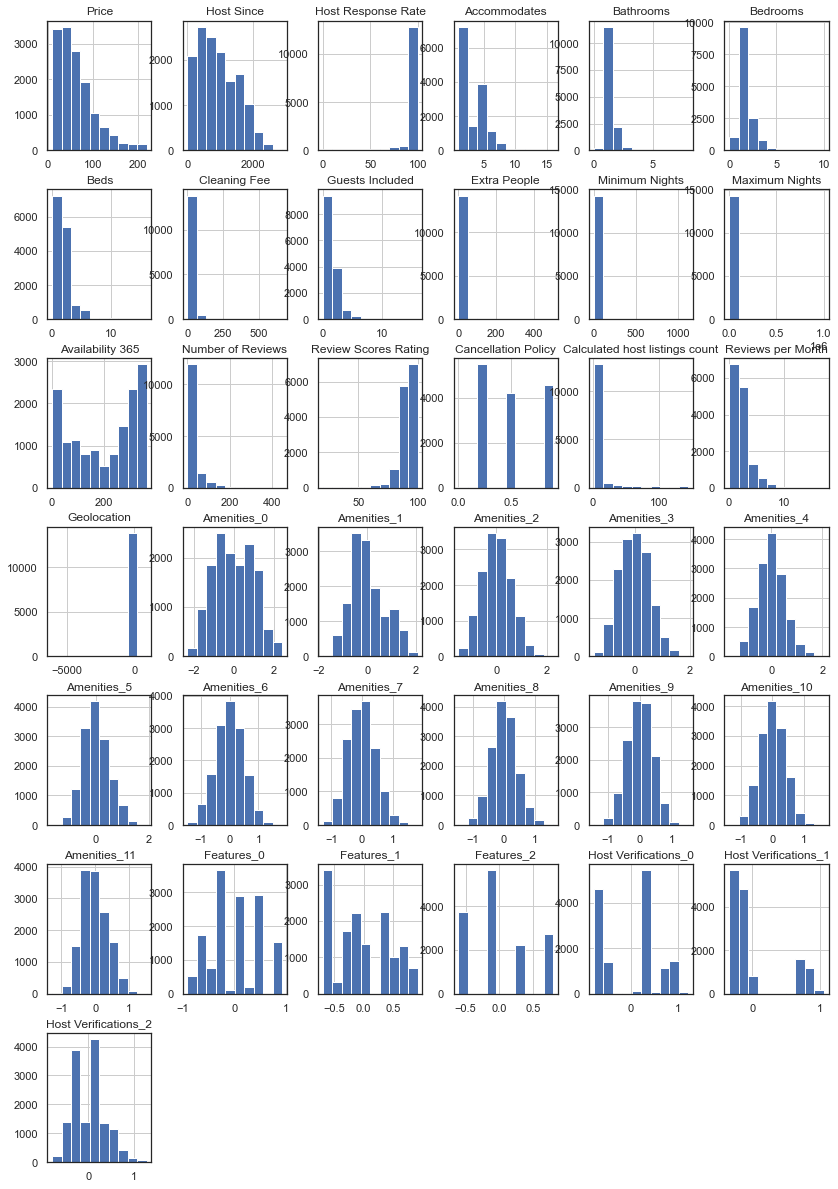

In [50]:
plt.rcParams['figure.figsize'] = (14,21)
datos.hist()
plt.show()

Tras los estudios realizados, vemos que las variables de "Amenities" se distribuyen aproximadamente de forma normal, aunque en general, todas las demás variables presentan ausencia de normalidad.

A la hora de tener en cuenta unos datos sobre otros, vemos que los valores de "Host Score Rate" suelen estar en frontera con su máximo, los valores usuales en "Accommodates" están comprendidos entre 1 y 5, observando la variables "Guests Included" deducimos que suelen haber 1 ó 2 huéspedes incluidos (Se puede deducir que uno es el anfitrión) y observando "Reviews per Month" lo más usual para los anfitriones es recibir una o dos reseñas al mes.

### 6.2. Gráficos sobre la Variable Objetivo

Vamos a estudiar gráficamente la variable objetivo "Price" en función de otras variables. De esta forma, conseguiremos hacernos una idea previa sobre que atributos podrían influir en el precio de los alojamientos.

<AxesSubplot:xlabel='Number of Reviews', ylabel='Price'>

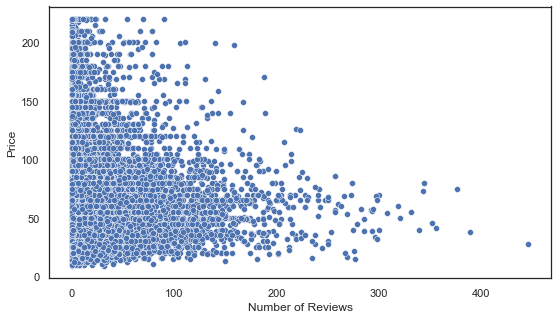

In [51]:
plt.rcParams['figure.figsize'] = (9,5)
sns.scatterplot(x=datos['Number of Reviews'],y=datos['Price'])

Deducimos que el número de reseñas quizás influya en el precio, ya que, salvo algún posible outlier, vemos que los alojamientos con un número elevado de reseñas suelen tener un precio bajo. De manera inversa, aquellos alojamientos con precios muy por encima de la media, tienen pocas reseñas.

Esta deducción resulta lógica. A los alojamientos con altos precios acceden menos clientes, por lo tanto, menos usuarios escriben reseñas sobre su estancia. Por el otro lado, a los alojamientos baratos accederán más clientes y estos a su vez escribirán más reseñas (En el entorno de la hostelería esto es habitual, sobretodo si el servicio ha sido una experiencia negativa, ya que los clientes usarán las reseñas para evaluar negativamente el alojamiento).

<AxesSubplot:xlabel='Review Scores Rating', ylabel='Price'>

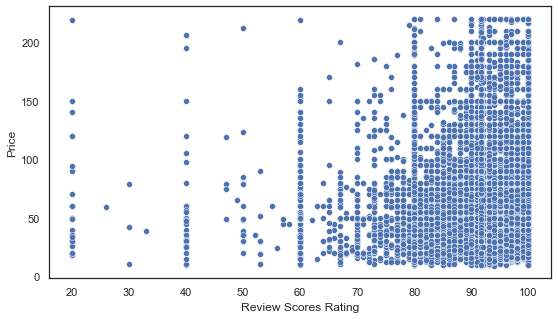

In [52]:
plt.rcParams['figure.figsize'] = (9,5)
sns.scatterplot(x=datos['Review Scores Rating'],y=datos['Price'])

De forma similar, en consecuencia a lo que acabamos de comentar, vemos que la puntuación que ofrecen las reseñas parece relacionarse con el precio. Los alojamientos con altos precios presentan altas puntuaciones en las reseñas, mientras que los que presentan baja puntuación en las reseñas suelen ser alojamientos baratos.

No obstante, hay que resaltar que no es extraña la existencia de alojamientos baratos con muy buenas reseñas en el dataset, pero en general, los que tienen reseñas negativas son baratos.

<AxesSubplot:xlabel='Reviews per Month', ylabel='Price'>

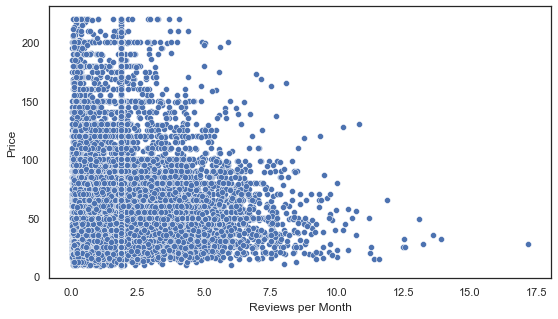

In [53]:
plt.rcParams['figure.figsize'] = (9,5)
sns.scatterplot(x=datos['Reviews per Month'],y=datos['Price'])

En este gráfico podemos deducir los mismos resultados que en el de "Number of Reviews". Tal vez, en el posterior análisis de regresión, se deba prescindir de esta variable.

Los gráficos de la variable objetivo en función de las demás variables continuas no arrojaban resultados de interés.

Ahora analicemos el precio medio en función de las variables categóricas:

<AxesSubplot:xlabel='Property Type'>

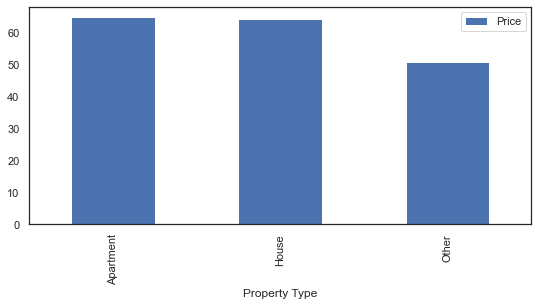

In [54]:
plt.rcParams['figure.figsize'] = (9,4)
pd.DataFrame(datos.groupby('Property Type')['Price'].mean().sort_values(ascending=False)).plot(kind='bar')

Podemos sospechar que no hay diferencias significativas sobre el precio entre alojarse en un apartamento y una casa. En cambio, si elegimos la otra opción el precio será inferior.

<AxesSubplot:xlabel='Room Type'>

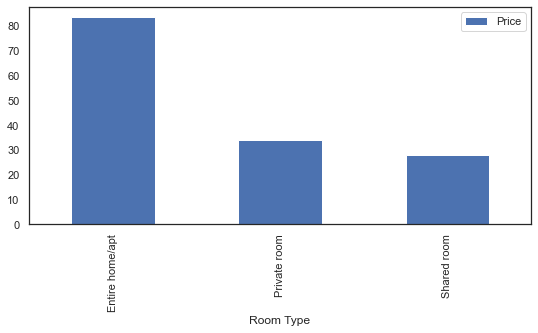

In [55]:
plt.rcParams['figure.figsize'] = (9,4)
pd.DataFrame(datos.groupby('Room Type')['Price'].mean().sort_values(ascending=False)).plot(kind='bar')

Era previsible imaginar que el precio de alojamiento se encarecerá si tenemos todo el inmueble a nuestra disposición. No obstante, curiosamente el precio entre una habitación privada y una compartida son similares.

<AxesSubplot:xlabel='Bed Type'>

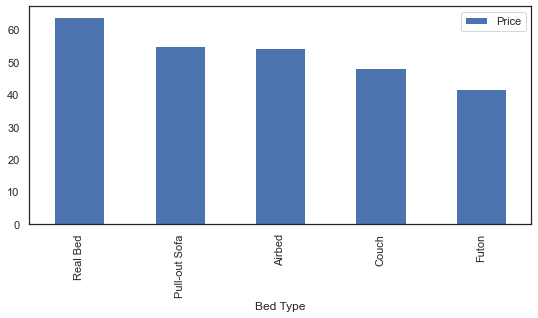

In [56]:
plt.rcParams['figure.figsize'] = (9,4)
pd.DataFrame(datos.groupby('Bed Type')['Price'].mean().sort_values(ascending=False)).plot(kind='bar')

En este caso no parece haber diferencias excesivas en el precio medio según el tipo de cama.

<AxesSubplot:xlabel='Market'>

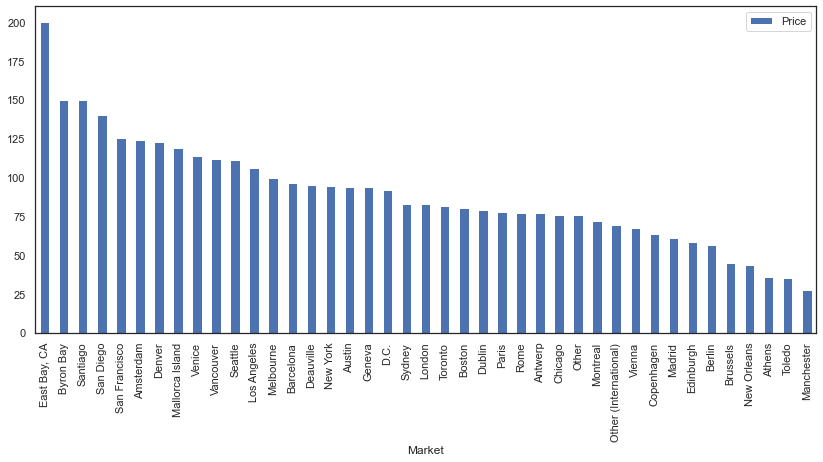

In [57]:
plt.rcParams['figure.figsize'] = (14,6)
pd.DataFrame(datos.groupby('Market')['Price'].mean().sort_values(ascending=False)).plot(kind='bar')

Observando el precio medio en función de las ciudades en el dataset observamos unos extremos curiosamente lejanos a la situación del mercado de la vivienda. Esto se puede deber a que las legislaciones locales sobre la plataforma Airbnb o el turismo son factores que no afectan tanto a la hora de comprar una vivienda, pero que alteran drásticamente el rango de precios de los alojamientos en esta plataforma.

# 7. Encoding

Respecto a las variables categóricas, haremos un encoding para finalmente poder trabajar con todas las variables juntas.

Tanto "Property Type", como "Room Type" y "Bed Type" las codificamos de forma binaria con OneHotEncoder.

La variable "Market" la codificamos mediante CatBoostEncoder, ya que contiene muchos valores y cada uno tendrá un peso distinto

In [58]:
ohe = OneHotEncoder()
oh_array = ohe.fit_transform(datos['Property Type'].values.reshape(-1, 1)).toarray()
oh_df = pd.DataFrame(oh_array,columns=['Apartment','House','Other'])
datos = pd.concat([datos,oh_df],axis=1)
datos = datos.drop(columns='Property Type')

In [59]:
ohe = OneHotEncoder()
oh_array = ohe.fit_transform(datos['Room Type'].values.reshape(-1, 1)).toarray()
oh_df = pd.DataFrame(oh_array,columns=['Entire home/apt','Private room','Shared room'])
datos = pd.concat([datos,oh_df],axis=1)
datos = datos.drop(columns='Room Type')

In [60]:
ohe = OneHotEncoder()
oh_array = ohe.fit_transform(datos['Bed Type'].values.reshape(-1, 1)).toarray()
oh_df = pd.DataFrame(oh_array,columns=['Airbed','Couch','Futon','Pull-out Sofa','Real Bed'])
datos = pd.concat([datos,oh_df],axis=1)
datos = datos.drop(columns='Bed Type')

In [61]:
cbe = ce.CatBoostEncoder(cols=['Market'])
datos['Market_CBE'] = cbe.fit_transform(datos['Market'],datos.Price)
datos = datos.drop(columns='Market')

In [62]:
datos.head()

,Price,Host Since,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Cleaning Fee,Guests Included,Extra People,...,Other,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Market_CBE
0,58.0,421.0,100.0,2,1.0,1.0,1.0,0.0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,63.710635
1,70.0,150.0,100.0,4,1.0,1.0,1.0,40.0,2,44,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,63.710635
2,70.0,150.0,100.0,4,1.0,1.0,1.0,60.0,2,42,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,66.855318
3,149.0,451.0,99.0,5,1.0,2.0,2.0,55.0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67.903545
4,106.0,451.0,99.0,6,1.0,2.0,3.0,0.0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,88.177659


Buscando reducir más el número de variables, realizamos un gráfico de correlación y eliminamos las variables con alta correlación.

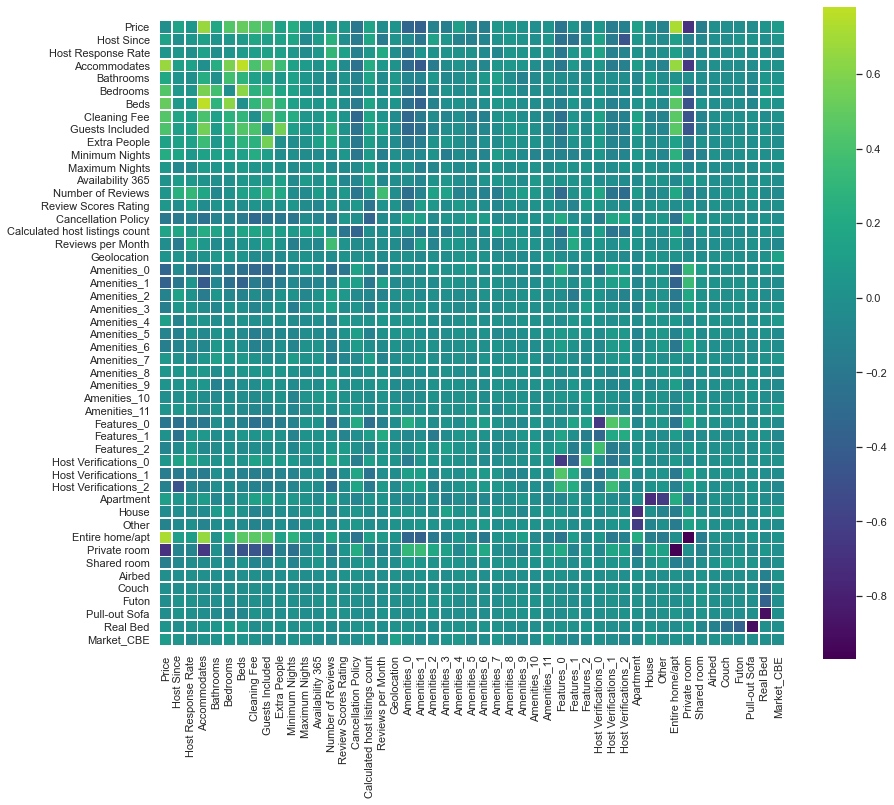

0

In [63]:
funciones_auxiliares.get_corr_matrix(dataset = datos, metodo='spearman', size_figure=[14,12])

In [64]:
datos = datos.drop(columns=['Accommodates','Entire home/apt','Pull-out Sofa'])

In [65]:
datos.head()

,Price,Host Since,Host Response Rate,Bathrooms,Bedrooms,Beds,Cleaning Fee,Guests Included,Extra People,Minimum Nights,...,Apartment,House,Other,Private room,Shared room,Airbed,Couch,Futon,Real Bed,Market_CBE
0,58.0,421.0,100.0,1.0,1.0,1.0,0.0,1,0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,63.710635
1,70.0,150.0,100.0,1.0,1.0,1.0,40.0,2,44,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,63.710635
2,70.0,150.0,100.0,1.0,1.0,1.0,60.0,2,42,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,66.855318
3,149.0,451.0,99.0,1.0,2.0,2.0,55.0,1,0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67.903545
4,106.0,451.0,99.0,1.0,2.0,3.0,0.0,1,0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,88.177659


# 8. Conjuntos Train y Test

Finalizada toda la limpieza y preprocesamiento de los datos procedemos a crear los conjuntos de entrenamiento y test que usaremos en los modelos predictivos que vamos a estudiar. También escalaremos los conjuntos en previsión de los modelos que lo requieran.

In [66]:
X = datos.iloc[:,1:46]
Y = datos['Price'].astype('int')

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((11440, 45), (2860, 45))

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model_scaled = scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# 9. Modelos de Regresión

### 9.1 KNN

Vamos a utilizar el algoritmo KNN para regresión.

Este método consiste en, una vez identificados los k vecinos de cada punto, en lugar de considerar su clase y establecer un sistema de "votación", se considerará el valor que toma la etiqueta para cada uno de ellos y se devolverá como predicción el valor medio de dichos valores.

En primer lugar vamos a buscar el k óptimo para el que aplicar el algoritmo, con un gráfico de codo, en el que veremos que k ofrece el menor error cuadrático medio.

In [68]:
k_list=np.arange(1,15,1)
knn_dict={} # Guardamos los k
for i in k_list:
    
# Creamos el modelo
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(X_train_scaled,Y_train)
    y_knn_pred=model_knn.predict(X_test_scaled)
    
# Guardamos el MSE
    mse=r2_score(Y_test,y_knn_pred)
    knn_dict[i]=mse


{1: 0.40719674394186, 2: 0.5407828647369644, 3: 0.5965582787546773, 4: 0.6120353761116688, 5: 0.6213885682629765, 6: 0.6229457991141194, 7: 0.6236073986878994, 8: 0.6318270056048132, 9: 0.6338238897588159, 10: 0.6320345640253824, 11: 0.6328068265455131, 12: 0.6340739477375995, 13: 0.6345488512317847, 14: 0.6326518991748458}


Text(0.5, 1.0, 'ELBOW PLOT')

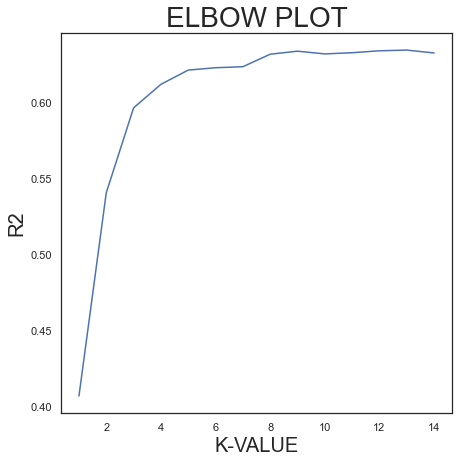

In [69]:
# Gráfico de codo:
fig,ax=plt.subplots(figsize=(7,7))
print(knn_dict)
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('R2' ,fontsize=20)
ax.set_title('ELBOW PLOT' ,fontsize=28)


Usando Cross-Validation:

In [70]:
random_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]}
knn_tune = KNeighborsRegressor()
knn_random = GridSearchCV(estimator = knn_tune, \
                         param_grid = random_grid, cv = 3)

knn_random.fit(X_train_scaled,Y_train)
print(knn_random.best_estimator_)

KNeighborsRegressor(n_neighbors=13)


Acabamos de comprobar que tanto por Cross-Validation como por el gráfico de codo que el mejor k es 12, por tanto **usamos k = 12** para KNN Regressor.

In [71]:
knn = KNeighborsRegressor(n_neighbors=12)

knn.fit(X_train_scaled, Y_train)

knn_pred=knn.predict(X_test_scaled)

Vemos las puntuaciones asociadas al modelo con diferentes métricas.

In [91]:
mse_knn = mean_squared_error(Y_test, knn_pred)
print("Regresión con KNN Regressor (MSE):",mse_knn )
rmse_knn = mean_squared_error(Y_test, knn_pred,squared=False)
print("Regresión con KNN Regressor (RMSE):",rmse_knn)
r2_knn = r2_score(Y_test, knn_pred)
print("Regresión con KNN Regressor (R^2):", r2_knn)
mae_knn =  mean_absolute_error(Y_test, knn_pred)
print("Regresión con KNN Regressor (MAE):",mae_knn)

Regresión con KNN Regressor (MSE): 598.8711295648795
Regresión con KNN Regressor (RMSE): 24.47184360780527
Regresión con KNN Regressor (R^2): 0.6340739477375995
Regresión con KNN Regressor (MAE): 16.72674825174825


### 9.2 Regresión Lineal


El modelo de regresión lineal busca determinar si existe una relación lineal entre una variable dependiente y una o varias independientes. El modelo debe examinar cuales son nuestras variables más significativas para predecir el 
precio del alojamiento. Por ejemplo parece lógico pensar que cuanto más espacioso sea un alojamiento mayor será su precio.

Además se pueden aplicar regularizaciones al modelo, que consiste en añadir penalizaciones a la función de costo, de manera que la complejidad del modelo disminuye a la vez que minimizamos la función de coste. Esto resulta en modelos más simples que tienden a generalizar mejor. 

La regularización que usaremos es Lasso(L1) ya que favorece que algunos de los coeficientes acaben valiendo 0. Esto será de ayuda  para descubrir cuáles de nuestras variables independientes son relevates para el precio del alojamieto.

Empezaremos buscando el mejor hiperparámetro 'alpha' usando cross validation

In [73]:
#Espacio de búsqueda del hiperparámetro alpha
# ==============================================================================
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=123)
lasso_alphas = 10**np.linspace(-2,2,200)
# ==============================================================================
#Búsqueda LassoCV
# ==============================================================================
lasso = LassoCV(alphas=lasso_alphas, cv=cv, n_jobs=-1)
lasso.fit(X_train_scaled, Y_train)
#Resultados
# ==============================================================================
print('alpha:', lasso.alpha_)

alpha: 0.11097524964120721


Por lo tanto construiremos nuestro modelo tomando este alpha.

In [74]:
modelLasso=lasso.fit(X_train_scaled, Y_train)
trainPred_lasso = modelLasso.predict(X_train_scaled)
testPred_lasso =modelLasso.predict(X_test_scaled)

Observamos los coeficientes que hemos obtenido.

In [75]:
lasso_betas = list(zip(X_train_scaled.columns,modelLasso.coef_))
coeff= pd.DataFrame(lasso_betas,columns=['característica','coeficiente']) 
coeff.sort_values(by='coeficiente', inplace=True)
coeff

,característica,coeficiente
38,Private room,-16.177427
39,Shared room,-5.075256
16,Geolocation,-3.343896
18,Amenities_1,-2.713988
17,Amenities_0,-2.512718
11,Number of Reviews,-2.021702
20,Amenities_3,-1.971355
7,Extra People,-1.519137
15,Reviews per Month,-1.361213
1,Host Response Rate,-0.709719


Las variables que no son significativas son "House", "Other", "Maximun Nights", "Airbed", "Host Verifications_0", "Apartment" y "Futon".
Por otra parte las 5 más importantes son "Private Room", "Bedrooms", "Shared room" y "Cleaning Fee".


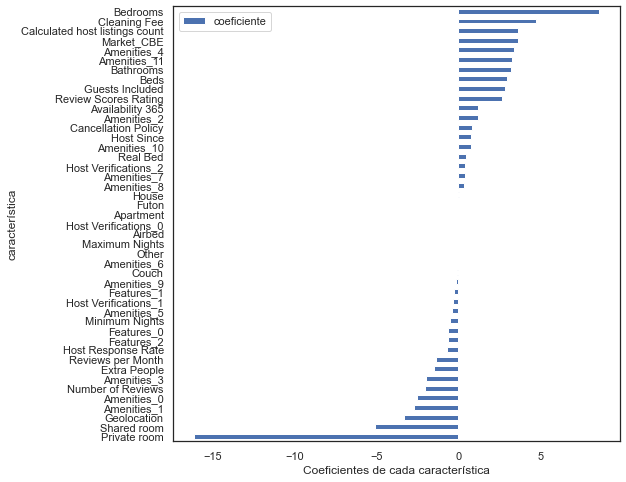

In [76]:
coeff2 = coeff.set_index('característica', drop=True)
coeff2.plot.barh(figsize=(8,8))
plt.xlabel('Coeficientes de cada característica')
plt.show()

In [77]:
mse_lasso = mean_squared_error(Y_test, testPred_lasso)
print("Regresión con Lasso (MSE):",mse_lasso)
rmse_lasso=mean_squared_error(Y_test, testPred_lasso,squared=False)
print("Regresión con Lasso (RMSE):", rmse_lasso)
r2_lasso = r2_score(Y_test, testPred_lasso)
print("Regresión con Lasso (R^2):", r2_lasso)
mae_lasso = mean_absolute_error(Y_test, testPred_lasso)
print("Regresión con Lasso (MAE):", mae_lasso)

Regresión con Lasso (MSE): 646.6818708943426
Regresión con Lasso (RMSE): 25.4299404422099
Regresión con Lasso (R^2): 0.6048603240267009
Regresión con Lasso (MAE): 17.901840831594907


### 9.3 Random forest

Un árbol de decisión es una técnica de aprendizaje automático que se puede utilizar para regresión y clasificación. Los árboles de decisión tienen la tendencia de sobre-ajustar (overfit). Esto quiere decir que tienden a aprender muy bien los datos de entrenamiento pero su generalización no es tan buena.

Podemos mejorar la capaidad de los árboles combinando varios. A esta combinación de la llama Random Forest.

Al combinar sus resultados, unos errores se compensan con otros y tenemos una predicción que generaliza mejor.

Este algoritmo puede capturar relaciones no lineales y no requiere ninguna transformación de las características si se trata de datos no lineales ya que los árboles de decisión no tienen en cuenta múltiples combinaciones ponderadas simultáneamente. Por tanto esta vez no escalaremos el set de entrenamiento. Es un algoritmo rápido y eficiente en comparación con KNN y ofrece fácil interpretación y visualización.

Vamos a ver cuáles son los parámetros óptimos para Random Forest con cross validation.

In [78]:
random_grid = {'n_estimators': [200],
                'max_features': [2,5],
               'max_depth': [40,70],
               'min_samples_split': [40,50],
                'max_leaf_nodes':[50,70],
                'max_features': [2,5]}
rf_tune = RandomForestRegressor()
rf_random = GridSearchCV(estimator = rf_tune, param_grid = random_grid, cv = 3, verbose=2,n_jobs = 2)

rf_random.fit(X_train,Y_train)
print(rf_random.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   46.8s
[Parallel(n_jobs=2)]: Done  48 out of  48 | elapsed:   57.2s finished


RandomForestRegressor(max_depth=40, max_features=5, max_leaf_nodes=70,
                      min_samples_split=40, n_estimators=200)


In [79]:
# Creamos el modelo:

RF = RandomForestRegressor(max_depth=40, max_features=5, max_leaf_nodes=70,
                      min_samples_split=50, n_estimators=200)
RF.fit(X_train,Y_train)

trainPred = RF.predict(X_train)
forest_pred =RF.predict(X_test)

Vemos cuáles son los pesos o importancias de cada variable en la regresión.

In [80]:
importancesRF = RF.feature_importances_
feat_imp1 = pd.DataFrame(importancesRF, columns=['Weight'], index=X_train.columns)
feat_imp1.sort_values('Weight', inplace=True)
feat_imp1

,Weight
Futon,0.000000
Couch,0.000000
Airbed,0.000000
Real Bed,0.000103
Other,0.000327
Maximum Nights,0.001199
House,0.001463
Apartment,0.001721
Features_2,0.002078
Amenities_8,0.002231


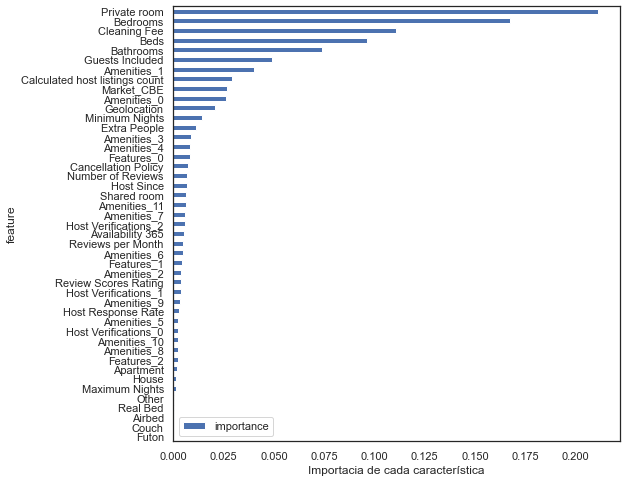

In [81]:
feat_imp = pd.DataFrame({'importance':RF.feature_importances_})  
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(figsize=(8,8))
plt.xlabel('Importacia de cada característica')
plt.show()

Vemos las puntuaciones asociadas al modelo con diferentes métricas.

In [92]:
mse_rf = mean_squared_error(Y_test, forest_pred)
print("Regresión con Random Forest (MSE):", mse_rf)
rmse_rf = mean_squared_error(Y_test, forest_pred,squared=False)
print("Regresión con Random Forest (RMSE):", rmse_rf)
r2_rf = r2_score(Y_test, forest_pred)
print("Regresión con Random Forest (R^2):", r2_rf)
mae_rf = mean_absolute_error(Y_test, forest_pred)
print("Regresión con Random Forest (MAE):", mae_rf)

Regresión con Random Forest (MSE): 592.6889450259255
Regresión con Random Forest (RMSE): 24.34520373761381
Regresión con Random Forest (R^2): 0.6378514255137293
Regresión con Random Forest (MAE): 17.298266921167986


### 9.4 Algoritmo SVM en Regresión

SVR (Support Vector Regression) es una variación de SVM (utilizado para clasificar), sin embargo, con esta variante el algoritmo SVR se utiliza para predecir valores con un margen de tolerancia (épsilon) establecido por el investigador.

Veamos cuál es el épsilon óptimo para SVR con cross validation.

In [83]:
# Grid de hiperparámetros
# ==============================================================================
param = {'epsilon':[1,5,10,15,20,25]}
modelsvr = SVR(kernel='linear')

# Búsqueda por cross validation
# ==============================================================================
grid = GridSearchCV(modelsvr,
                    param,
                    cv=5)
_=grid.fit(X_train_scaled,Y_train)
grid.best_estimator_
print(grid.best_estimator_)


SVR(epsilon=20, kernel='linear')


Por lo tanto construiremos nuestro modelo tomando epsilon con valor 20.

In [84]:
modelSVR = SVR(kernel='linear',epsilon=20)
modelSVR.fit(X_train_scaled,Y_train)

trainPred_svr = modelSVR.predict(X_train_scaled)
testPred_svr =modelSVR.predict(X_test_scaled)

Veamos cuales son los pesos de cada variable en la regresión.








In [86]:
mse_svr = mean_squared_error(Y_test, testPred_svr)
print("Regresión con SVR (MSE):",mse_svr)
rmse_svr=mean_squared_error(Y_test, testPred_svr,squared=False)
print("Regresión con SVR (RMSE):", rmse_svr)
r2_svr = r2_score(Y_test, testPred_svr)
print("Regresión con SVR (R^2):", r2_svr)
mae_svr = mean_absolute_error(Y_test, testPred_svr)
print("Regresión con SVR (MAE):", mae_svr)

Regresión con SVR (MSE): 645.1325179456373
Regresión con SVR (RMSE): 25.399459008916654
Regresión con SVR (R^2): 0.6058070195344518
Regresión con SVR (MAE): 17.813895171578316


In [87]:
coefSVR = modelSVR.coef_
feat_imp = pd.DataFrame({'Weight':coefSVR[0]})  
feat_imp['característica'] = X_train.columns
feat_imp.sort_values(by='Weight', inplace=True)
feat_imp

,Weight,característica
38,-14.618376,Private room
39,-5.345941,Shared room
16,-2.995388,Geolocation
18,-2.775696,Amenities_1
17,-2.681551,Amenities_0
20,-2.165096,Amenities_3
11,-1.659559,Number of Reviews
15,-1.519890,Reviews per Month
7,-1.442772,Extra People
29,-1.422278,Features_0


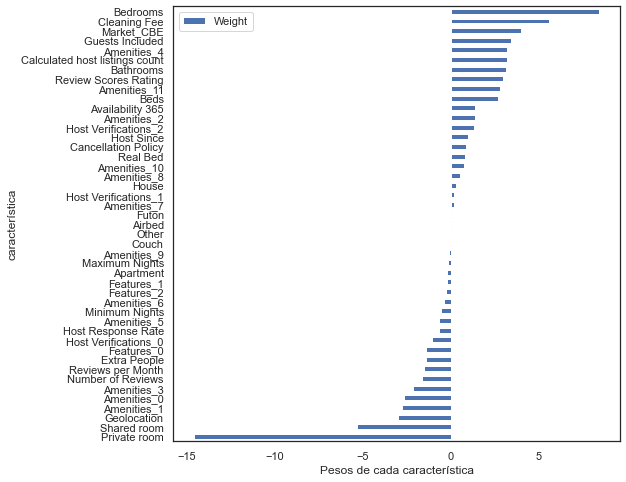

In [88]:
feat_imp = feat_imp.set_index('característica', drop=True)
feat_imp.plot.barh(figsize=(8,8))
plt.xlabel('Pesos de cada característica')
plt.show()

# 10. Resultados de los Modelos de Regresión y Conclusión

In [95]:
resultados = pd.DataFrame({
    'Modelo':['KNN','Lasso','Random Forest','SVR'],
    'MSE':[mse_knn,mse_lasso,mse_rf,mse_svr],
    'RMSE':[rmse_knn,rmse_lasso,rmse_rf,rmse_svr],
    'R2':[r2_knn,r2_lasso,r2_rf,r2_svr],
    'MAE':[mae_knn,mae_lasso,mae_rf,mae_svr]
    })
resultados

,Modelo,MSE,RMSE,R2,MAE
0,KNN,598.871130,24.471844,0.634074,16.726748
1,Lasso,646.681871,25.429940,0.604860,17.901841
2,Random Forest,592.688945,24.345204,0.637851,17.298267
3,SVR,645.132518,25.399459,0.605807,17.813895


A la hora de medir el grado de acierto de los diferentes modelos de regresión que hemos obtenido deberemos tomar en cuanta los valores obtenidos en sus métricas, para hacernos una idea de los acertado que sería el modelo que hemos construido.

El error cuadrático medio (Mean Squared Error, MSE), también llamado mínimos cuadrados ordinarios (Ordinary Least Squares, OLS) calcula la media de los errores al cuadrado y cuanto mayor sea, peor es el modelo.
Se debe tener en cuenta que al medir un valor cuadrático penaliza los errores mayores y nunca es negativo, esto ayudará a identificar resultados atípicos. Esta métrica no funciona bien con datos de baja calidad, pero afortunadamento toda la fase de preprocessing ha dado sus frutos y ese no es un problema que nos afecte.

La raíz cuadrada del error cuadrático medio (Root Mean Squared Error, RMSE), es equivalente a la métrica anterior en términos de ordenar cómo funcionan los modelos pero al ser una raíz cuadrada tiene el mismo orden de magnitud que la variable objetivo.

El error absoluto medio (Mean Absolute Error, MAE) se calcula como el promedio de los errores en valor absoluto. Al no ser cuadrático, penaliza menos los errores altos y atípicos que el MSE.

El coeficiente de determinación o R², compara el error cuadrático medio de mi modelo con un error cuadrático medio de referencia. Esta referencia se calcula asumiendo que el valor de una predicción es el promedio de todas las estimaciones. Es decir, sin tener en cuenta ningún modelo ni dependencia con otras variables
En general el R² se puede ver como una versión estandarizada del error cuadrático medio que refleja la relación de la variable objetivo con respecto al resto de variables del modelo.
Cuanto más se acerque a 1, mayor es la relación de las variables del modelo con el objetivo. Lo que quiere decir que mejor es el resultado del algoritmo.


Observando las métricas no detectamos valores de MSE, RMSE y MAE que nos avisen de que nuestros modelos son demasiado erróneos. Tomando como métrica principal R² observamos que siendo el máximo valor posible 1 los valores de los modelos son bastante decentes, estando todos por encima del 0'6.

Finalmente, tras visualizar, limpiar, preprocesar y aplicar los algoritmos con cuidado, hemos logrado producir varios modelos de regresión de aprendizaje automático con puntuaciones R² de predicción relativamente altas. El mejor modelo hasta el momento fue un modelo Ramdom Forest que obtuvo un valor R² de 0.637851 seguido de cerca por el modelo KNN que obtuvo un valor R² de 0.634074. Con cualquiera de estos dos modelos ya sería viable construir un evaluador automático de precios a partir de las carácterísticas de los alojamientos de Airbnb y por tanto se puede considerar el objetivo de la práctica cumplido.